# Ejercicio 1

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

import warnings

import funciones_auxiliares_machine_learning as aux

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

# Ejercicio 2

In [20]:
import pickle

modelo_propio = pickle.load(open('javier-rojas-actividad07.sav', 'rb'))
X_train = pickle.load(open('javier-rojas-X-train-actividad07.sav', 'rb'))
y_train = pickle.load(open('javier-rojas-y-train-actividad07.sav', 'rb'))
X_test = pickle.load(open('javier-rojas-X-test-actividad07.sav', 'rb'))
y_test = pickle.load(open('javier-rojas-y-test-actividad07.sav', 'rb'))

In [21]:
aux.reportar_metricas_regresion(modelo_propio, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 24502        |
| R2  |     0.778335 |


## Reportar metricas de modelo de companero

In [22]:
modelo_companero = pickle.load(open('diego_lizana_actividad07.sav', 'rb'))
X_train_c, X_test_c, y_train_c, y_test_c = pickle.load(open('matrices_train_test.sav', 'rb'))

In [25]:
aux.reportar_metricas_regresion(modelo_companero, X_test_c, y_test_c)

|     |     valores |
|:----|------------:|
| MAE | 23524.9     |
| R2  |     0.80861 |


- Segun los resultados, el modelo del compañero Diego Lizana tiene un mejor desempeño. Esto,
ya que presenta un MAE mas bajo, y un R2 mas alto que el modelo propio.

In [26]:
aux.reportar_metricas_regresion(modelo_companero, X_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Exter_Qual_Typical
- Foundation_PConc
- Longitude
Feature names seen at fit time, yet now missing:
- Exual_Typical
- Fireplaces
- Year_Remod_Add


- El modelo de Diego Lizana genera un error al intentar validarlo con los datos de validacion propios.
Esto ocurre debido a que el modelo utiliza variables independientes que estan ausentes en el conjunto de datos de validacion propia.

- Esta diferencia en al utilizacion de variables pudo ocurrir debido a las siguientes razones:
    - Distinto random_state al momento de declarar el modelo
    - Distinta separacion de datos con train_test_split (lo que pudo generar un sesgo de importancia
    hacia las distintas variables utilizadas en cada modelo)

# Ejercicio 3

In [27]:
random_forest = RandomForestRegressor(random_state=1)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [28]:
aux.reportar_metricas_regresion(random_forest, X_test, y_test)

|     |      valores |
|:----|-------------:|
| MAE | 19682.1      |
| R2  |     0.857885 |


- La tabla comparativa de resultados son las siguientes:


Modelo|MAE|R2
------|---|--
Optimizado con Grilla de sesion anterior|24502|0.78|
RandomForest|19682|0.86|

- Por lo tanto, se puede observar que el modelo basado en un RandomForest tuvo un drastico aumento en el desempeno (disminucion del error, y aumento del poder explicativo r2).

# Ejercicio 4

In [48]:
from tqdm.autonotebook import tqdm

max_features = [None, 'log2', 'sqrt']
n_estimators = range(20, 1001, 50)

resultados_oob = {}
resultados_validacion = {}

for feature in max_features:
    for estimator in tqdm(n_estimators):
        modelo_arbol = RandomForestRegressor(random_state=1, oob_score=True, bootstrap=True,
                                             max_features=feature, n_estimators=estimator,
                                             n_jobs=-1).fit(X_train, y_train)
        parametros_act = f'max_features: {feature}, n_estimators: {estimator}'

        resultados_oob[parametros_act] = modelo_arbol.oob_score_

        yhat = modelo_arbol.predict(X_test)
        mae_validacion = r2_score(y_test, yhat)

        resultados_validacion[parametros_act] = mae_validacion

resultados_resumidos = pd.DataFrame({'oob': resultados_oob.values(),
                                     'validacion': resultados_validacion.values()},
                                     index=resultados_validacion.keys())


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [62]:
print(resultados_resumidos['oob'].sort_values(ascending=False).head(1))
print(resultados_resumidos['validacion'].sort_values(ascending=False).head(1))

max_features: log2, n_estimators: 870    0.858367
Name: oob, dtype: float64
max_features: None, n_estimators: 770    0.863679
Name: validacion, dtype: float64


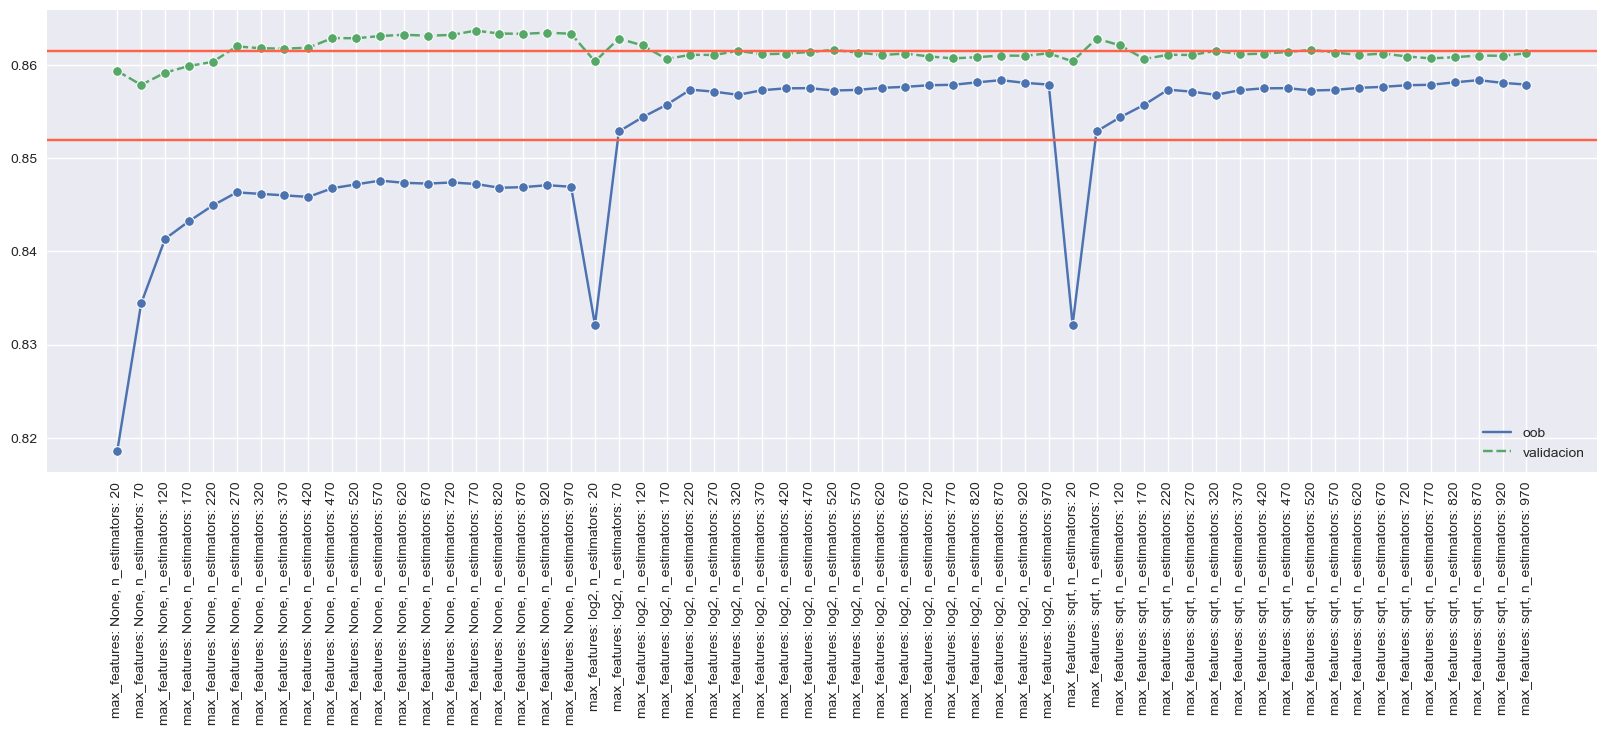

In [56]:
fig, axis = plt.subplots(figsize=(20, 6))
sns.lineplot(resultados_resumidos, ax=axis, marker='o')
axis.axhline(resultados_resumidos['oob'].mean(), c='tomato')
axis.axhline(resultados_resumidos['validacion'].mean(), c='tomato')
axis.tick_params(axis='x', labelrotation=90)

- Por lo tanto, se puede ver una diferencia en el desempeno al utilizar el oob score y una
validacion con los datos separados. El oob score presenta una mayor variacion en los puntajes,
mientras que el puntaje con los datos de validacion tiende a ser mas estable.

- Si tomamos en cuenta el puntaje con los datos de validacion, entonces los mejores parametros son:

    - max_features: None
    - n_estimators: 770

# Ejercicio 5

In [65]:
random_optimo = RandomForestRegressor(n_estimators=870, max_features='log2', oob_score=True, bootstrap=True,
                                      random_state=1).fit(X_train, y_train)
aux.calcular_metricas_regresion(random_optimo, X_test, y_test)

,valores
MAE,19374.705012
R2,0.858639


- La tabla resumen de todos los modelos son los siguientes:

Modelo|MAE|R2
------|---|--
Grilla|24420|0.76|
RandomForest|19723|0.859|
RandomForest Optimo|19374|0.858|

- Teniendo en cuenta estos resultados, el modelo optimo presenta el mae mas bajo y un r2 comparable al random forest sin optimizacion de hiperparametros. Por lo tanto, el modelo
optimizado presenta el mejor desempeno.